In [1]:
import pandas as pd
icu = pd.read_csv("ICUData.csv")
icu

,ID,sex,age,surgery,heart rate,temperature,bilirubin,SAPS II,liver failure,LOS,outcome
0,1,female,76,other,98.0,36.5,6.512142,57,0,1,died
1,2,female,60,gastrointestinal,80.0,38.1,14.523197,52,0,2,home
2,3,male,66,cardiothoracic,99.6,37.4,22.972480,57,0,1,secondary care/rehab
3,4,male,74,other,110.0,39.1,19.299346,45,0,2,home
4,5,female,68,other,94.1,38.5,39.076485,49,0,1,home
...,...,...,...,...,...,...,...,...,...,...,...
495,496,male,62,cardiothoracic,118.0,37.3,13.234537,33,0,1,secondary care/rehab
496,497,male,67,cardiothoracic,115.0,38.0,10.740772,56,0,1,died
497,498,female,53,cardiothoracic,131.0,37.9,14.131188,38,0,3,secondary care/rehab
498,499,male,68,other,86.9,36.0,9.596478,66,0,2,home


### Metric Değişkenler

#### Tek Değişkenli (Univariate) Analiz

- Mesafeler ve hatta oranlar tanımlandığından, metrik değişkenler durumunda daha ileri analizler mümkündür. Açıkça belirtilmediği takdirde, tanıtılan analizler aralık ve oran ölçekli değişkenler için de mümkündür. Muhtemelen verileri tanımlamak için en sık kullanılan istatistik aritmetik ortalamadır.
- Bu bölümde yine icu veri seti kullanılmaktadır. YBÜ'de kalınan süre boyunca maksimum vücut sıcaklığının aritmetik ortalamasını bulalım.

In [3]:
icu.temperature.mean()

37.663199999999996

Yani, aritmetik ortalama normal aralığın sadece biraz üzerindedir. Aritmetik ortalamayı virgülden sonra tek basamağa yuvarlamak için round fonksiyonu kullanılır.

In [7]:
round(icu.temperature.mean(), 1)

37.7

Aritmetik ortalamanın her zaman medyan ile karşılaştırılması tavsiye edilir, çünkü medyan verilerin ortasının başka bir tanımını verir ve aykırı değerlere karşı çok sağlamdır

In [11]:
import numpy as np
import statistics as st
np.median(icu.temperature)
st.median(icu.temperature)

37.7

Medyan ve aritmetik ortalama aynı kabul edilebileceğinden, maksimum vücut sıcaklığı dağılımının aritmetik ortalama (medyan) etrafında oldukça simetrik olması muhtemeldir. Buna ek olarak, ya hiç aykırı değer yoktur ya da pozitif ve negatif aykırı değerler birbirini nötralize etmektedir. Gün cinsinden verilen LOS (kalış süresi) değişkenini kullanarak analizi tekrar edelim.

<Axes: xlabel='temperature', ylabel='Count'>

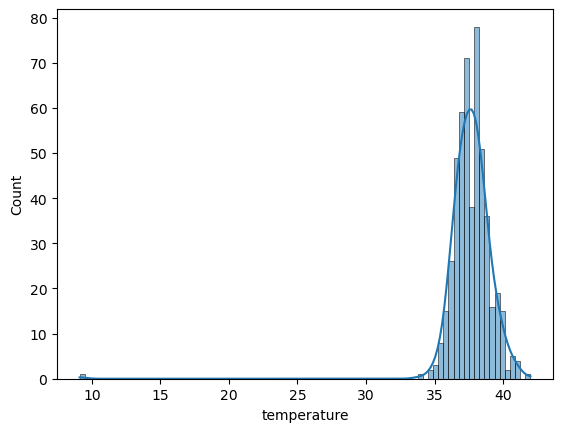

In [13]:
sns.histplot(icu.temperature, kde=True)

In [1]:
import plotly.express as px
px.box(icu.temperature)

NameError: name 'icu' is not defined

In [20]:
print(f"mean : {round(np.mean(icu.LOS), 1)}")
print(f"median : {np.median(icu.LOS)}")

mean : 5.3
median : 1.0


- Bu durumda, aritmetik ortalama ile medyan arasında açık bir fark görüyoruz. Ya LOS dağılımı çarpıktır (daha doğrusu sağa çarpıktır ya da aritmetik ortalamayı sağa çeken aykırı değerler vardır). 

<Axes: xlabel='LOS', ylabel='Count'>

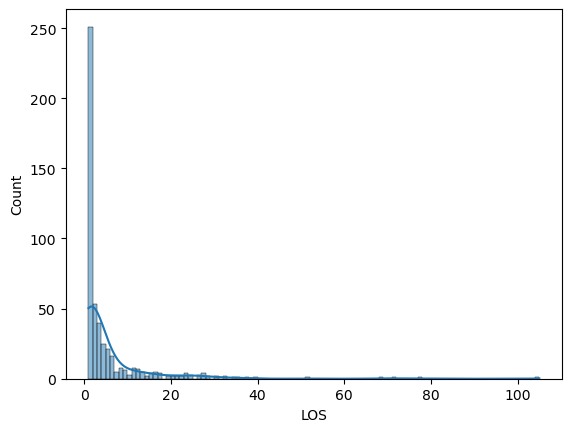

In [21]:
sns.histplot(icu.LOS, kde=True)

- Verilerin diyagramlarını ele aldığımız aşağıda bu iki durumu ayırt edebileceğiz. Bir diğer konum parametresi, göreceli değişiklikler durumunda uygulanan geometrik ortalamadır. Bu konum ölçüsü yalnızca kesin pozitif veriler için anlamlı bir şekilde tanımlanır.

![image](figure10.png)

Aşağıdaki açıklamada, geometrik ve aritmetik ortalama arasındaki önemli bir bağlantı açıklanmaktadır.

![image](figure11.png)

Yani, logaritması alınmış gözlemlerin aritmetik ortalaması, logaritma tabanının önemsiz olduğu geometrik ortalamanın logaritmasına eşittir. Doğal logaritma (ln) seçilirse, e-fonksiyonu  uygulanarak yazılabilir.

![image](figure12.png)

Üstel bir büyüme veya azalma izleyen süreçler gözlemleniyorsa, verilerin logaritmasını almak ve logaritması alınmış gözlemleri analiz etmek genellikle daha kolaydır. Bu durum örneğin icu veri setinde yer alan bilirubin ölçümleri için geçerlidir.

<Axes: xlabel='bilirubin', ylabel='Count'>

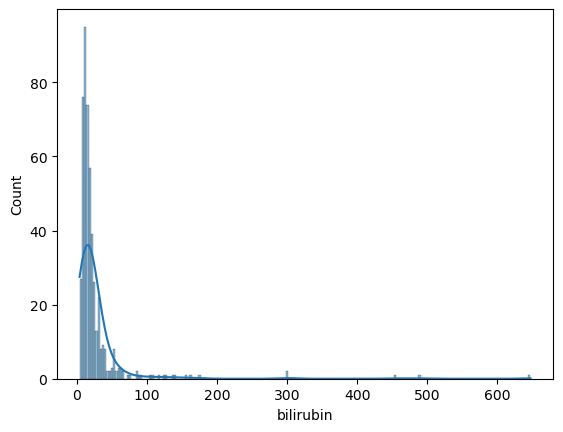

In [25]:
sns.histplot(icu.bilirubin, kde=True)

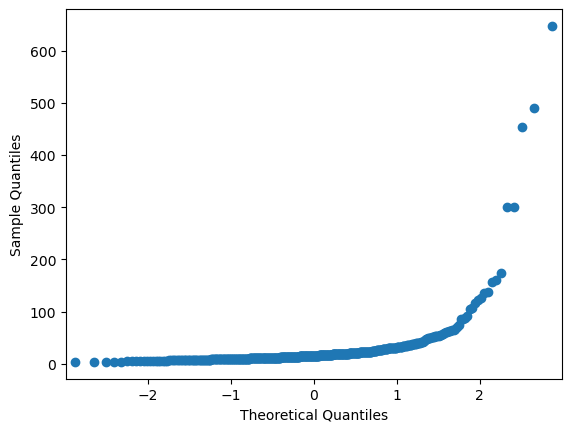

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(icu.bilirubin)
plt.show()

In [3]:
from scipy.stats import gmean
import math

math.log(gmean(icu.bilirubin))

2.8473262538107837

In [9]:
from statistics import mean
import numpy as np
mean(np.log(icu.bilirubin))

2.847326253810784

In [10]:
np.exp(mean(np.log(icu.bilirubin)))

17.24162043918728

In [11]:
gmean(icu.bilirubin)

17.241620439187272

Uygulamada, sadece konum değil, gözlemlerin dağılımı da ilgi çekicidir. Muhtemelen en sık uygulanan dağılım ölçüsü,**varyansın karekökü olan standart sapmadır**

![image](figure13.png)

![image](figure14.png)

Varyans kavramını bir veri kümesine uygularsak, örneklem varyansı ile popülasyon varyansı arasında ayrım yapılabilir. Popülasyon varyansı yukarıda gösterilen varyanstır ve popülasyonun tamamından elde edilen verileri ve $σ^{2}\$ ifadesini kullanarak hesaplanabilir.

Örnek varyansı $S^{2}\$ olarak gösterilir ve bunu belirli bir popülasyondan alınan bir örnek ve aşağıdaki ifade kullanılarak hesaplanabilir:

![image](figure15.png)

Bu ifade $σ^{2}\$'yi hesaplamak için kullanılan ifadeye oldukça benzemektedir, ancak bu durumda xi örneklemdeki bireysel gözlemleri temsil ederken X örneklemin ortalamasıdır.


$\\S^{2}$ yaygın olarak bir örnek veri kullanarak bir popülasyonun varyansını ($\\σ^{2}$) tahmin etmek için kullanılır. Ancak, $S^{2}\$  sistematik olarak popülasyon varyansını olduğundan düşük tahmin eder. Bu nedenle, popülasyon varyansının yanlı bir tahmincisi olarak adlandırılır.

Büyük bir örneğe sahip olduğumuzda, $\\S^{2}$ $\\σ^{2}$ için yeterli bir tahminci olabilir. Küçük örneklemler için çok düşük olma eğilimindedir. Bu durumda, $\\σ^{2}$'yi daha iyi tahmin etmek için kullanabilecek başka bir basit istatistik vardır. İşte denklemi:

![image](figure16.png)

Bu, önceki ifadeye oldukça benzemektedir. Bu durumda n yerine n - 1'e bölüyoruz. Buna **Bessel düzeltmesi** denir. **Bessel düzeltmesi**, $\\S^{2}_{n-1}$'in popülasyon varyansı için en iyi yansız tahmin edici olduğunu gösterir. Dolayısıyla, pratikte, bir veri örneği kullanarak bir popülasyonun varyansını tahmin etmek için bu denklem kullanılır. $\\S^{2}_{n-1}$ n - 1 serbestlik dereceli varyans olarak da bilinir

In [14]:
from statistics import variance, stdev

variance(icu.temperature);

In [15]:
stdev(icu.temperature)

1.7354738543112644

Aritmetik ortalama ve medyan karşılaştırmasına benzer şekilde, şimdi de standart sapma ile medyan mutlak sapmasını karşılaştıralım.

In [16]:
stdev(icu.temperature)

1.7354738543112644

In [23]:
from statsmodels import robust
robust.mad(icu.temperature)

1.1860817748044774

Her iki istatistik arasında açık bir fark vardır. Ya sıcaklık dağılımı aritmetik ortalama etrafında simetrik bir dağılımla tanımlanamıyor ya da standart sapmayı bozan aykırı değerler var. Bunun nedenini aşağıda belirleyeceğiz.

Pozitif ölçümler söz konusu olduğunda, uygulamada genellikle aşağıdaki standartlaştırılmış dağılım ölçüsü kullanılır.

**Coefficent of Variation**

![image](figure17.png)

- Değişim katsayısı boyutsuz bir büyüklüktür ve genellikle yüzde olarak verilir; yani aritmetik ortalamaya göre yüzdesel dağılımdır. Sonuç olarak, sadece oran ölçekli değişkenlere uygulanmalıdır.

- Kantillere dayalı varyasyon katsayısı çeşitleri vardır. Seçeneklerden biri medyan ve MAD'e dayanmaktadır

  ![image](figure18.png)

  Alternatif olarak, çeyrek dağılım katsayısı olarak adlandırılan çeyrekler de kullanılabilir

  ![image](figure19.png)


In [20]:
stdev(icu.temperature) / mean(icu.temperature)

0.046078767983370086

In [21]:
from statistics import median
robust.mad(icu.temperature) / median(icu.temperature)

0.03146105503460152

In [22]:
from scipy.stats import iqr
iqr(icu.temperature) / median(icu.temperature)

0.03978779840848806

Sırasıyla aritmetik ortalama, medyan etrafında yaklaşık %3-5 aralığında sadece küçük varyasyonlar olduğu görülmektedir.

In [24]:
from scipy.stats import gstd
gstd(icu.temperature)

1.07326731736915

Konum ve ölçek ölçülerine ek olarak, metrik değişkenler söz konusu olduğunda şekil ölçüleri de kullanılır. Bir şekil simetri ölçüsü çarpıklıktır (skewness).

![image](figure20.png)

Skew (𝑥1 , ... , 𝑥𝑛 ) < 0 ise veri dağılımı sola çarpık, Skew (𝑥1 , ... , 𝑥𝑛 ) > 0 ise sağa çarpıktır.\

Bir dağılımın çarpıklığı aritmetik ortalama ve medyan kullanılarak da belirlenebilir. Eğer AM (𝑥1 , ... , 𝑥𝑛 ) < medyan (𝑥1 , ... , 𝑥𝑛 ) ise dağılım sola çarpıktır. Tersine, AM (𝑥1 , ... , 𝑥𝑛 ) > medyan (𝑥1 , ... , 𝑥𝑛 ) ise dağılım sağa çarpıktır.

![image](figure21.png)

In [26]:
from scipy.stats import skew

skew(icu.temperature)

-8.800959897847758

Sola çarpık bir dağılıma işaret eden bu sonuç, medyan ve aritmetik ortalamanın (aşağı yukarı) aynı olduğu ve simetrik bir dağılıma kanıt teşkil ettiği yukarıdaki gözlemimizle çelişmektedir. Ölçülen sıcaklıklara daha yakından bakıldığında, 398 numaralı hastanın maksimum (!) vücut sıcaklığının 9,1◦ 𝐶 gibi anormal derecede düşük olduğu görülmektedir (ölçüm ya da transkripsiyon hatası?). Hesaplamayı 398 numaralı hasta olmadan tekrarlıyoruz. Hasta 398'in maksimum vücut sıcaklığına erişmek için köşeli parantez ve indeksini kullanabiliriz.

In [2]:
icu.temperature[397]
icu[icu["temperature"] == 9.1]

,ID,sex,age,surgery,heart rate,temperature,bilirubin,SAPS II,liver failure,LOS,outcome
397,398,male,81,other,123.0,9.1,20.23374,99,0,1,died


In [37]:
skew(icu.temperature.drop(397))

0.31523806699087253

Şimdi, çarpıklık çok küçüktür ve ilk izlenimimizi doğrulamaktadır. Hasta 398 olmadan değerlerin dağılımı aritmetik ortalama etrafında oldukça simetriktir. Ayrıca, 398 numaralı hastanın çıkarılması standart sapmayı da azaltmaktadır.

In [38]:
stdev(icu.temperature.drop(397))

1.1731873166428928

Bu da şu anda standartlaştırılmış MAD'ye çok yakındır.

Kalış süresi (LOS) için çarpıklığı hesaplayalım. Aritmetik ortalama ve medyana dayanarak, yukarıda dağılımın sağa çarpık olması gerektiği sonucuna varmıştık. Dolayısıyla, pozitif bir çarpıklık değeri bekleriz.

In [39]:
skew(icu.LOS)

4.895505496636184

**Basıklık (Kurtosis)**

![image](figure22.png)

Kurt (𝑥1 , ... , 𝑥𝑛 ) < 0 ise veri dağılımı platikurtik, Kurt (𝑥1 , ... , 𝑥𝑛 ) > 0 ise leptokurtiktir.

Basıklığı tanımlamak için referans normal dağılımdır. Normal dağılımın basıklığı 0'dır. Negatif bir basıklık gözlemlersek, dağılım normal dağılımdan daha düz ve daha az kavislidir. Basıklık pozitifse, dağılım normal dağılımdan daha dik ve daha kavislidir;

![image](figure23.png)

In [41]:
from scipy.stats import kurtosis
kurtosis(icu.temperature)

145.05652943229478

In [42]:
kurtosis(icu.temperature.drop(397))

0.3566105994244779

Bir kez daha, tek bir gözlemin etkisinin ne kadar büyük olabileceği görülmüştür. Dağılımın aşırı leptokurtik olmadığı, ancak bir gözlem dışında normal dağılım tarafından oldukça iyi tanımlanabileceği sonucuna varıyoruz. Kalış süresinin (LOS) basıklığı:

In [43]:
kurtosis(icu.LOS)

33.74164008536902

LOS'un leptokurtic olduğu görülmektedir.

Histogramları kullanarak dağılımı daha ileri düzeyde analiz edelim. Histogram, bir metrik değişkenin aralığını ardışık aralıklara bölerek elde edilen özel bir çubuk grafik türüdür. Her aralık için, dahil edilen gözlemlerin mutlak veya göreceli frekansı bir çubuk ile görselleştirilir. Aralıkları seçmek için, yazılım programları tarafından otomatik olarak bir dizi eşit uzunlukta aralık seçmek için kullanılan bazı temel kurallar vardır. Ancak, çoğu durumda aralıkları elle seçmek ve bağlama uygun bir bölüm seçmek daha iyidir. Maksimum vücut sıcaklıklarının bir histogramını oluşturulmuştur.

<Axes: xlabel='temperature', ylabel='Count'>

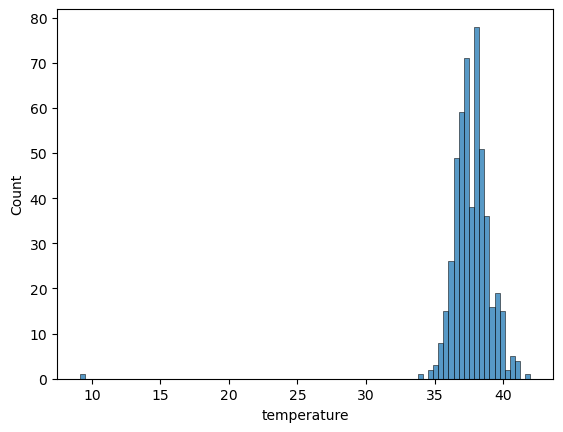

In [4]:
import seaborn as sns
sns.histplot(icu.temperature)

[(33.0, 43.0),
 Text(0.5, 0, 'Maximum Body Temperature'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

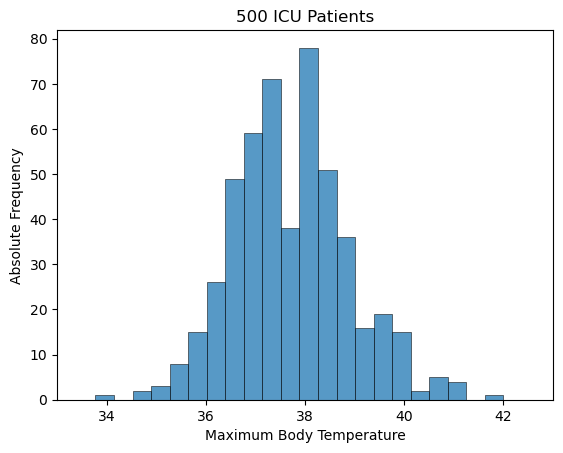

In [5]:
hst = sns.histplot(icu.temperature)
hst.set(xlim=(33,43), xlabel="Maximum Body Temperature", 
        ylabel="Absolute Frequency", title="500 ICU Patients")

Grafik, önceki hesaplamalarımızı doğrulamaktadır; yani, dağılım aritmetik ortalama etrafında oldukça simetriktir ve YBÜ popülasyonundaki maksimum vücut sıcaklığının dağılımı (güçlü düşük soğutma/hipotermisi olan hastalar hariç) muhtemelen normal bir dağılımla iyi bir şekilde tanımlanmaktadır.

[Text(0.5, 0, 'Long of Stay in Days'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

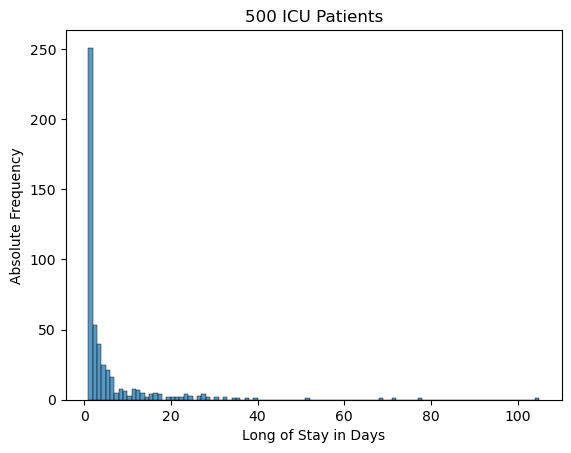

In [8]:
hst = sns.histplot(icu.LOS, binwidth=1)
hst.set(xlabel="Long of Stay in Days", 
        ylabel="Absolute Frequency", title="500 ICU Patients")

Şekil önceki hesaplamaları doğrulamaktadır. Açıkça sağa çarpık ve oldukça sivri bir dağılım elde edilmekte. Hastaların çoğunluğu sadece birkaç günlük bir yaşam süresine sahiptir. Maksimum yaşam süresi 105 gündür.

Alternatif olarak, gözlemlenen değerlerin dağılımı tahmini yoğunlukları aracılığıyla görselleştirilebilir. 

Yoğunluk grafiklerini düzleştirilmiş histogramların grafikleri olarak düşünülebilir.  Yoğunluk grafikleri çoğunlukla bir kernel yoğunluk tahmini kullanır. Kernel yoğunluk tahmini, gürültüyü yumuşatarak daha düzgün dağılımlar elde edilmesini sağlar.

Yoğunluk grafikleri, histogramlar dikkate alındığında önemli bir parametre olan kutu(bin) sayısından etkilenmez, bu nedenle verilerin dağılımını daha iyi görselleştirmeye olanak tanır.



<Axes: xlabel='temperature', ylabel='Density'>

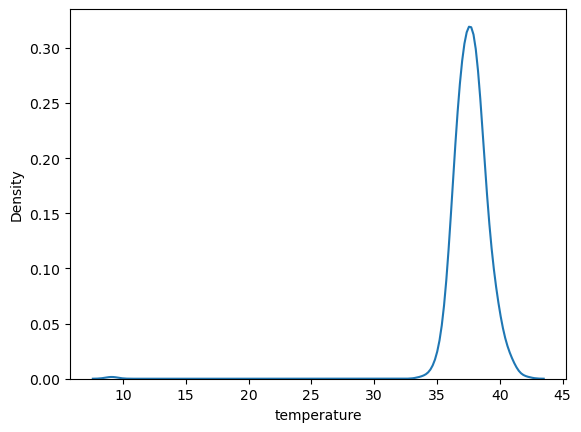

In [61]:
sns.kdeplot(icu.temperature)

<Axes: xlabel='temperature', ylabel='Density'>

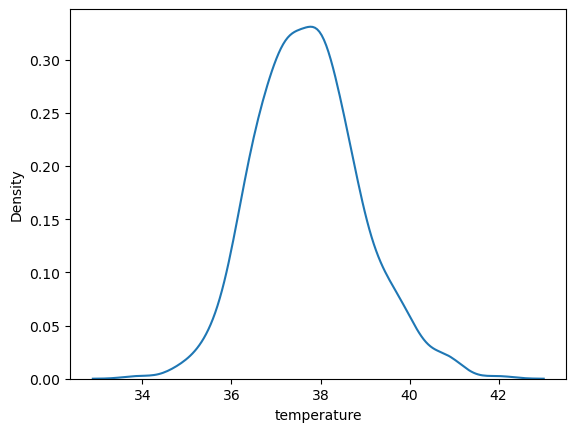

In [62]:
sns.kdeplot(icu.temperature.drop(397))

<Axes: ylabel='Density'>

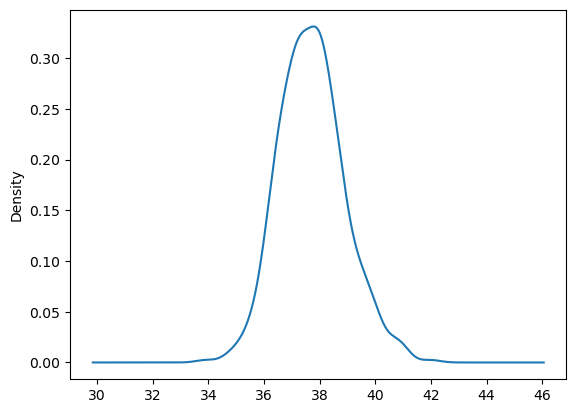

In [63]:
icu.temperature.drop(397).plot(kind="density")

Aritmetik ortalama etrafında oldukça simetrik bir yoğunluk elde edildiği görülmektedir.

<Axes: xlabel='temperature', ylabel='Count'>

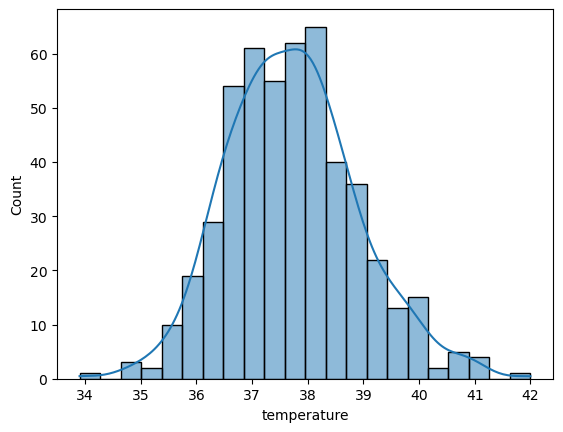

In [69]:
sns.histplot(icu.temperature.drop(397), kde=True)

In [70]:
# plotnine https://realpython.com/ggplot-python/

Maksimum vücut sıcaklığının dağılımı ampirik kümülatif dağılım fonksiyonu aracılığıyla da görselleştirebilir.burada yine 398 numaralı hastayı atlayacağız.

<Axes: xlabel='temperature', ylabel='Proportion'>

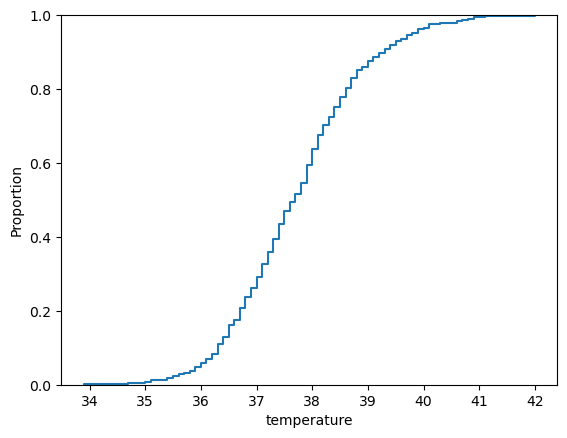

In [9]:
sns.ecdfplot(data=icu.temperature.drop(397))

Verilerin ampirik dağılımını göstermenin bu yollarının bir diğer önemli uygulaması, varsayılan bir olasılık modelinin dağılımı ile karşılaştırmaktır. Bunu yaparken, varsayılan bir modelin grafiksel olarak doğrulanması mümkündür. İleriki derslerde bundan da bahsedilecektir.

#### Bivariate Analysis

Metrik değişkenler arasındaki ilişkinin gücü ve yönü, sıralı verilerde olduğu gibi korelasyon yoluyla tanımlanabilir. Sıralama korelasyonlarının yanı sıra Pearson korelasyonu da kullanılabilir.

![image](figure24.png)

Pearson korelasyonu [-1; 1] aralığında değerler alabilir; burada 1 mükemmel pozitif doğrusal ilişkiyi ve -1 mükemmel negatif doğrusal ilişkiyi temsil eder.

In [72]:
from scipy.stats import pearsonr

pearsonr(icu.temperature, icu["heart rate"])

PearsonRResult(statistic=0.17630666238406734, pvalue=7.384039483665922e-05)

Zayıf bir pozitif ilişki vardır; yani vücut sıcaklığı arttıkça kalp atış hızı da artma eğilimindedir.

Verileri bir dağılım diyagramı aracılığıyla çizilir ve böylece doğrusal bir ilişki varsayımının haklı olup olmadığı da doğrulanır.

<Axes: xlabel='temperature', ylabel='heart rate'>

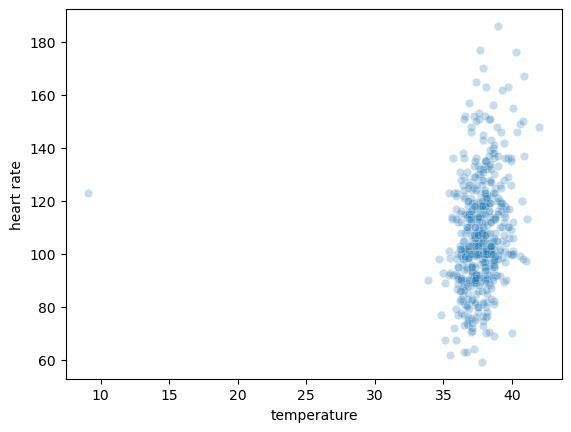

In [75]:
sns.scatterplot(x=icu.temperature, y=icu["heart rate"], alpha=0.25)

In [76]:
pearsonr(icu.temperature.drop(397), icu["heart rate"].drop(397))

PearsonRResult(statistic=0.2978033285606186, pvalue=1.118148500008259e-11)

In [80]:
from scipy import stats
print(stats.spearmanr(icu.temperature, icu["heart rate"]))
print(stats.spearmanr(icu.temperature.drop(397), icu["heart rate"].drop(397)))

SignificanceResult(statistic=0.26599572175445046, pvalue=1.5207779303155718e-09)
SignificanceResult(statistic=0.27072412991880884, pvalue=7.870418648465133e-10)


In [82]:
print(stats.kendalltau(icu.temperature, icu["heart rate"]))
print(stats.kendalltau(icu.temperature.drop(397), icu["heart rate"].drop(397)))

SignificanceResult(statistic=0.18269029154469063, pvalue=1.9348573865883658e-09)
SignificanceResult(statistic=0.1858803609351711, pvalue=1.0499001854398001e-09)


Her iki sıra korelasyonu da çok az değişmektedir. Dolayısıyla, sıralamalara geçiş, aykırı değerlere karşı niceliklerle karşılaştırılabilecek belirli bir sağlamlık oluşturmaktadır. 